<a href="https://colab.research.google.com/github/whatnews72/----/blob/master/Deep_learning_mnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape= ', x_train.shape,', train label shape=',t_train.shape)
print(' test shape= ',  x_train.shape,', train label shape=',t_train.shape)

print('\n train label = ', t_train)       #학습데이터 정답 출력
print(' test label = ', t_test)           #테스트 데이터 정답 출력

11490434/11490434 [==============================] - 0s 0us/step

 train shape=  (60000, 28, 28) , train label shape= (60000,)
 test shape=  (60000, 28, 28) , train label shape= (60000,)

 train label =  [5 0 4 ... 5 6 8]
 test label =  [7 2 1 ... 4 5 6]


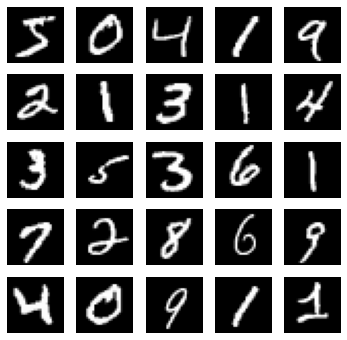

In [ ]:
import matplotlib.pyplot as plt
# 25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25):

  plt.subplot(5,5, index +1)     #5행 5열
  plt.imshow(x_train[index], cmap ='gray')
  plt.axis('off')
  # plt.title(str(t_train[index]))

plt.show()


In [ ]:
#학습 데이터 / 테스트 데이터 정규화 (Normalization)
x_train = (x_train-0.0)/ (255.0-0.0)
x_test = (x_test-0.0)/ (255.0-0.0)

#정답 데이터 원핫 인코딩(One-Hot Encoding)
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28크기 2차원 이미지를 784개의 1차원 백터로 변환
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
#정답을 원핫 인코딩 방식으로 나타냈기 때문에 loss='categorigal_crossentropy'
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3) #training data로 부터 30% 비율로 valication data생성후 overfitting 확인

Epoch 1/30
1313/1313 [==============================] - 7s 4ms/step - loss: 0.3109 - accuracy: 0.9122 - val_loss: 0.1845 - val_accuracy: 0.9483
Epoch 2/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1425 - accuracy: 0.9580 - val_loss: 0.1387 - val_accuracy: 0.9601
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0988 - accuracy: 0.9717 - val_loss: 0.1222 - val_accuracy: 0.9646
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0748 - accuracy: 0.9776 - val_loss: 0.1183 - val_accuracy: 0.9651
Epoch 5/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.1147 - val_accuracy: 0.9664
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.1032 - val_accuracy: 0.9694
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.1039 - val_accuracy:

In [ ]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1347 - accuracy: 0.9767


[0.13473138213157654, 0.9767000079154968]

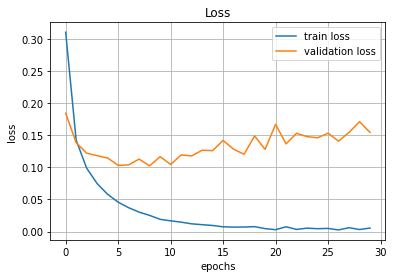

In [ ]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label= 'validation loss')

plt.legend(loc = 'best')
plt.show()

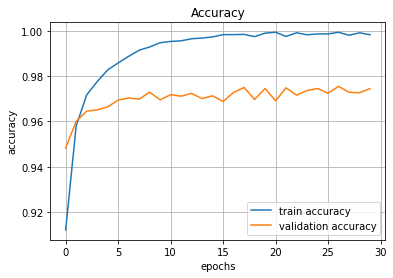

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label= 'validation accuracy')

plt.legend(loc = 'best')
plt.show()

313/313 [==============================] - 1s 2ms/step


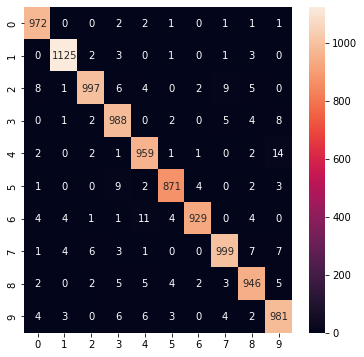

In [ ]:
# 혼동 행렬(confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (6,6))
predicted_value = model.predict(x_test)
cm = confusion_matrix(np.argmax(t_test, axis=-1), np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
print(cm)
print('\n')

for i in range(10):
  print(('label = %d\t(%d/%d)\taccuracy = %.3f')%(i,np.max(cm[i]), np.sum(cm[i]),np.max(cm[i])/np.sum(cm[i])))

[[ 972    0    0    2    2    1    0    1    1    1]
 [   0 1125    2    3    0    1    0    1    3    0]
 [   8    1  997    6    4    0    2    9    5    0]
 [   0    1    2  988    0    2    0    5    4    8]
 [   2    0    2    1  959    1    1    0    2   14]
 [   1    0    0    9    2  871    4    0    2    3]
 [   4    4    1    1   11    4  929    0    4    0]
 [   1    4    6    3    1    0    0  999    7    7]
 [   2    0    2    5    5    4    2    3  946    5]
 [   4    3    0    6    6    3    0    4    2  981]]


label = 0	(972/980)	accuracy = 0.992
label = 1	(1125/1135)	accuracy = 0.991
label = 2	(997/1032)	accuracy = 0.966
label = 3	(988/1010)	accuracy = 0.978
label = 4	(959/982)	accuracy = 0.977
label = 5	(871/892)	accuracy = 0.976
label = 6	(929/958)	accuracy = 0.970
label = 7	(999/1028)	accuracy = 0.972
label = 8	(946/974)	accuracy = 0.971
label = 9	(981/1009)	accuracy = 0.972
